<a href="https://colab.research.google.com/github/SriRamK345/ML_sample_DS_Sup_lerning/blob/main/LR_sampleds1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [239]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [241]:
df.drop('name', axis = 1, inplace = True)

In [242]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


**Summary of the Dataset**

In [243]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Data Preprocessing**

In [244]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [245]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [246]:
df.dropna(inplace = True)

In [247]:
df.isnull().sum().any()

False

In [248]:
df.shape

(392, 8)

**Univariate Analysis**

In [249]:
df.cylinders.value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [250]:
df.cylinders.unique()

array([8, 4, 6, 3, 5])

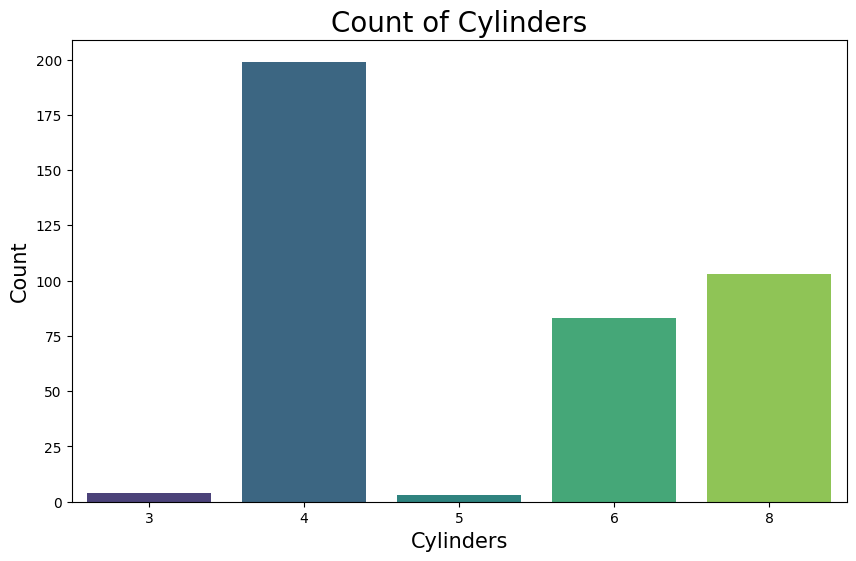

In [251]:
plt.figure(figsize = (10, 6))
sns.countplot(x=df['cylinders'], data = df,palette = "viridis")
plt.title("Count of Cylinders", fontsize = 20)
plt.xlabel("Cylinders", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

In [252]:
df["model_year"] = (1900 + df["model_year"])

In [253]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


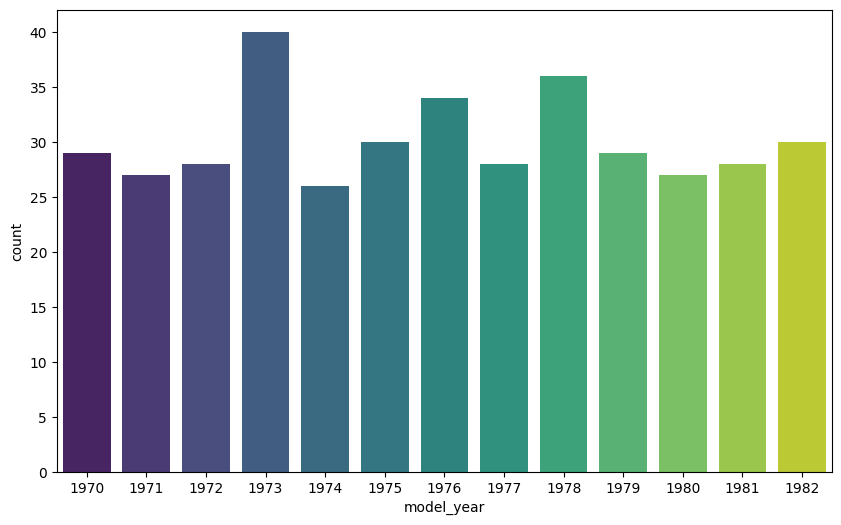

In [254]:
plt.figure(figsize = (10, 6))
sns.countplot(x=df['model_year'], data = df,palette = "viridis")
plt.show()

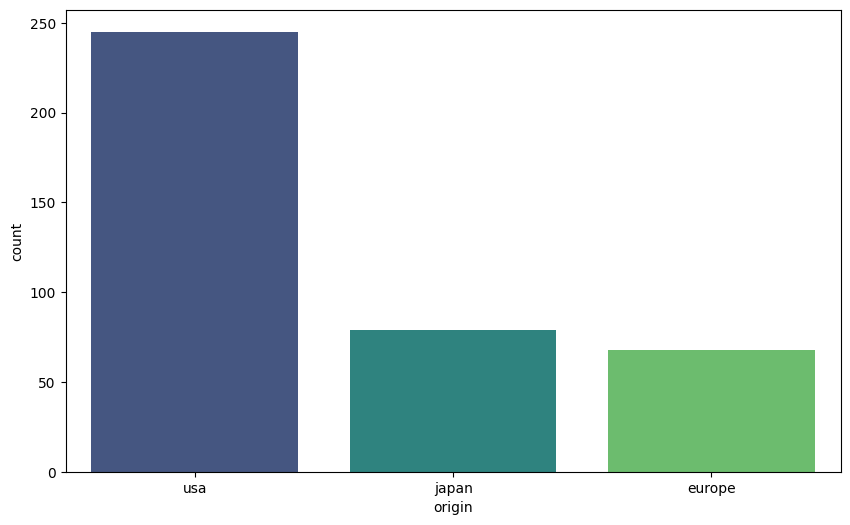

In [255]:
plt.figure(figsize = (10, 6))
sns.countplot(x=df['origin'], data = df,palette = "viridis")
plt.show()

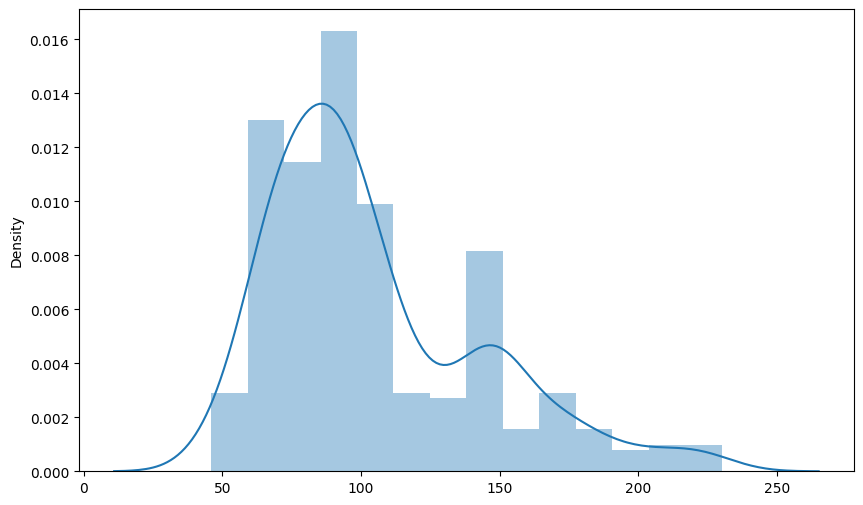

In [256]:
plt.figure(figsize = (10, 6))
sns.distplot(x=df['horsepower'])
plt.show()

**Bivariate Analysis**

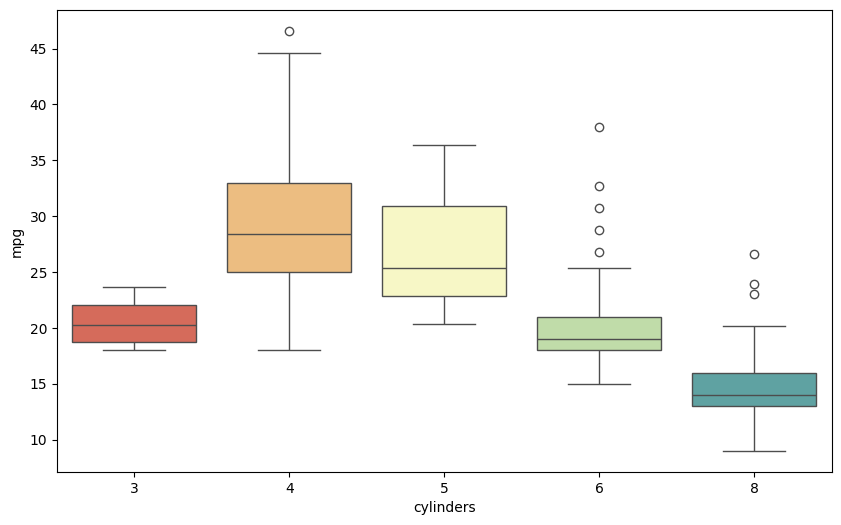

In [257]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "cylinders", y ="mpg", data = df, palette= "Spectral")
plt.show()

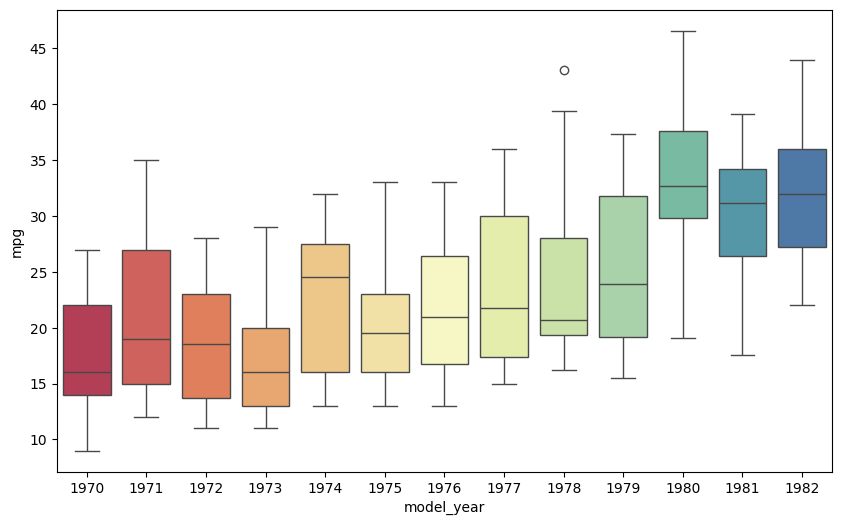

In [258]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "model_year", y ="mpg", data = df, palette= "Spectral")
plt.show()

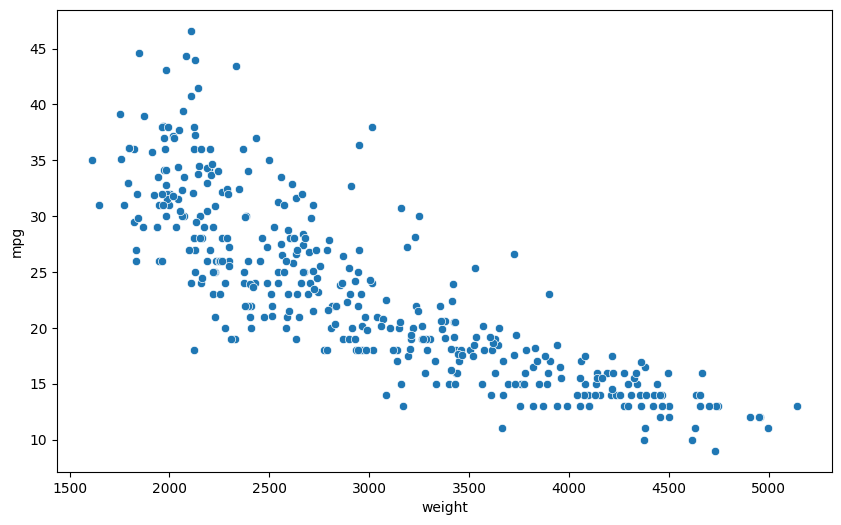

In [259]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = df['weight'], y = df['mpg'],palette= "Spectral")
plt.show()

In [260]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

**Muntivariate Analysis**

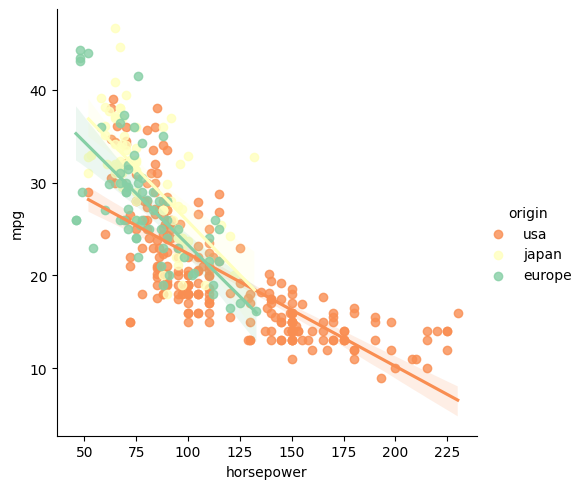

In [261]:
sns.lmplot(x="horsepower", y = "mpg", hue = "origin", data = df, palette= "Spectral")
plt.show()

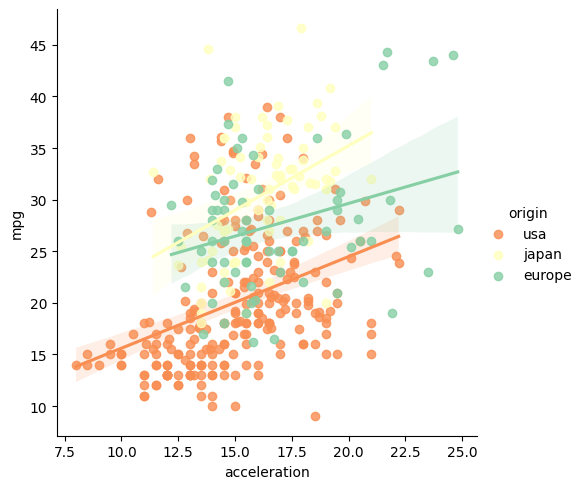

In [262]:
sns.lmplot(x="acceleration", y = "mpg", hue = "origin", data = df, palette= "Spectral")
plt.show()

**Heatmap of Correlation Matrix**

In [263]:
df_copy = df.copy()
df_copy.drop("origin", axis =1,inplace = True)

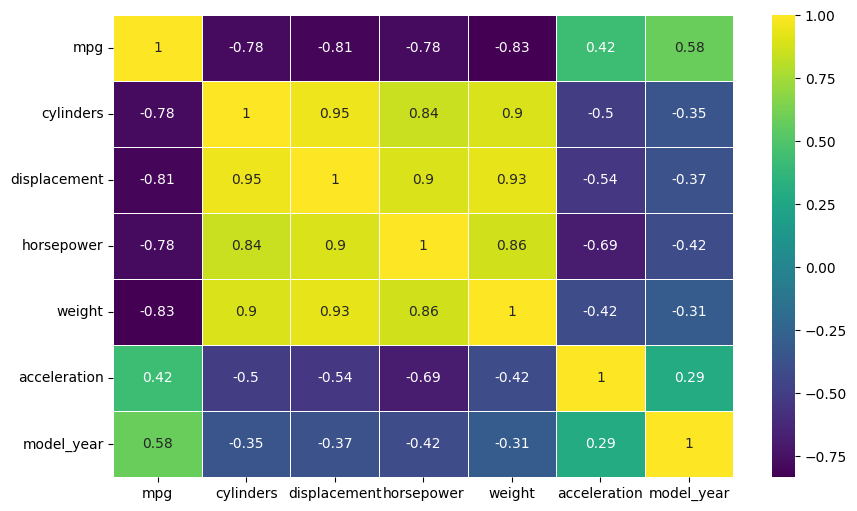

In [264]:
plt.figure(figsize = (10, 6))
sns.heatmap(df_copy.corr(), annot = True,linewidth = 0.5, cmap = "viridis")
plt.show()

In [265]:
from datetime import datetime

today = datetime.today()
today

datetime.datetime(2024, 7, 29, 14, 4, 58, 350862)

In [266]:
this_year = today.year
this_year

2024

In [267]:
 df['age'] = this_year - df['model_year']
 df.drop('model_year', axis = 1, inplace = True)
 df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,usa,54
1,15.0,8,350.0,165.0,3693,11.5,usa,54
2,18.0,8,318.0,150.0,3436,11.0,usa,54
3,16.0,8,304.0,150.0,3433,12.0,usa,54
4,17.0,8,302.0,140.0,3449,10.5,usa,54


In [268]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [269]:
df.replace({'origin': {'usa': 1, 'japan': 2, 'europe': 3}}, inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,1,54
1,15.0,8,350.0,165.0,3693,11.5,1,54
2,18.0,8,318.0,150.0,3436,11.0,1,54
3,16.0,8,304.0,150.0,3433,12.0,1,54
4,17.0,8,302.0,140.0,3449,10.5,1,54


In [275]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-0.711285,1.625315
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-0.711285,1.625315
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-0.711285,1.625315
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-0.711285,1.625315
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-0.711285,1.625315


**Modelling**

In [276]:
X = df.drop('mpg', axis = 1)
y = df['mpg']

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [280]:
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
y_pred = lm_model.predict(X_test)

In [282]:
lm_model.intercept_

79.4376781538658

In [283]:
coeff_df = pd.DataFrame(lm_model.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.220448
displacement,0.015165
horsepower,-0.012035
weight,-0.006862
acceleration,0.057864
origin,1.520786
age,-0.816806


In [287]:
my_dist = {'Actual': y_test, 'Predicted': y_pred}
compare = pd.DataFrame(my_dist)
compare.sample(10)

,Actual,Predicted
3,16.0,15.028389
356,32.4,32.055712
235,26.0,29.285976
304,37.3,33.145480
57,24.0,24.958441
83,28.0,24.144075
34,16.0,15.790975
125,20.0,20.322744
91,13.0,11.859637
9,15.0,12.787084


In [289]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.7924340895411552
Mean Squared Error:  10.594285130533116
Mean Absolute Error:  2.567137794432376
Root Mean Squared Error:  3.254886346792022


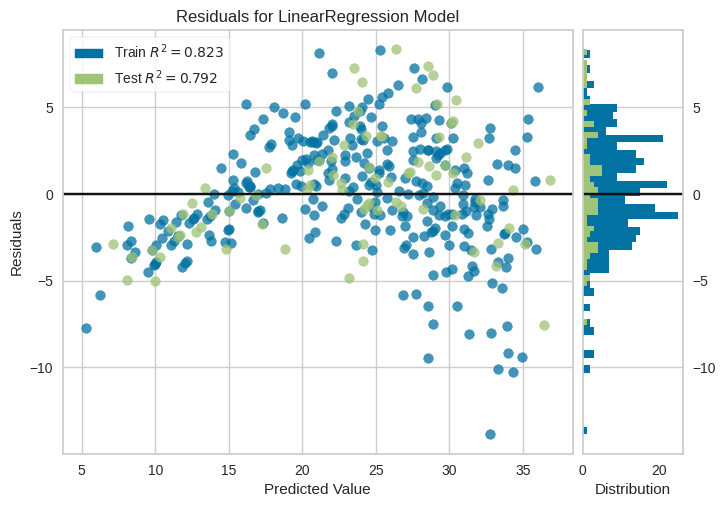

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [290]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

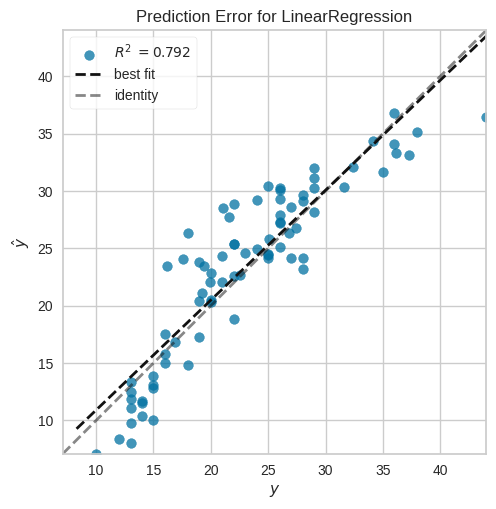

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [291]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [292]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [295]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.7518033599598775
Mean Squared Error:  12.668101265822788
Mean Absolute Error:  2.4455696202531647
Root Mean Squared Error:  3.559227622086397
